# Testing thershold

In [1]:
from glob import glob

import numpy as np
import pickle

from polyphys.manage.parser import HnsCyl
from polyphys.analyze.clusters import generate_contact_matrix, find_direct_contacts, hns_binding

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import NonUniformImage
from matplotlib.patches import Circle, Rectangle
from matplotlib import cm

In [3]:
probe_path = "/Users/amirhsi_mini/research_data/HnsCyl-trjs/N*distMatTMonHns*.npy"
paths = sorted(glob(probe_path))
print(paths)
lj_cut = np.round(2**(1/6),6)
print(lj_cut)
dmon = 1
dhcore = 1
print('sigma_mon: ', dmon)
dhpatch_cut = 0.2
print('rcut_hpatch: ', dhpatch_cut)
dhpatch = np.round(dhpatch_cut/lj_cut, 3)
print('sigma_hpatch: ', dhpatch)
dist_m_hpatch = 0.5 * (dhpatch_cut + dmon)
print('dist_m_hpatch along HNS molecule axis: ', dist_m_hpatch)
sigma_mon_hpatch = np.round(dist_m_hpatch / lj_cut, 3)
print('sigma_mon_hpatch: ', sigma_mon_hpatch)
rcut_mon_hpatch = sigma_mon_hpatch + 0.15*dmon
print('rcut_mon_hpatch: ', rcut_mon_hpatch)
rcut_m_hpatch_min = sigma_mon_hpatch
print('rcut_m_hpatch_min: ', rcut_m_hpatch_min)
rcut_m_hpatch_max = rcut_mon_hpatch
print('rcut_m_hpatch_max: ', rcut_m_hpatch_max)
print(rcut_m_hpatch_max-rcut_m_hpatch_min)
rcut_m_hpatch_range = np.round(np.arange(rcut_m_hpatch_min-0.02, rcut_m_hpatch_max+0.02, 0.01), 3)
rcut_m_hpatch_range = np.append(rcut_m_hpatch_range, 2)
rcut_m_hpatch_range = np.append(rcut_m_hpatch_range, 0.1)
rcut_m_hpatch_range.sort()
print(rcut_m_hpatch_range)
#rcut_m_hpatch_min = 0.5 * (dmon + dhcore)
#rcut_m_hpatch_max = np.round(0.5 * lj_cut * (dmon + dhcore), 3) #+ 
#rcut_m_hcore_range = np.round(np.arange(rcut_m_hpatch_min-0.04, rcut_m_hpatch_max+0.04, 0.01), 4)
#print(rcut_m_hcore_range)

['/Users/amirhsi_mini/research_data/HnsCyl-trjs/N200kbmm2r4.5nh12ac2lz75nc221ens3.ring-nucleoid-distMatTMonHnsCore.npy', '/Users/amirhsi_mini/research_data/HnsCyl-trjs/N200kbmm2r4.5nh12ac2lz75nc221ens3.ring-nucleoid-distMatTMonHnsPatch.npy', '/Users/amirhsi_mini/research_data/HnsCyl-trjs/N200kbmm2r4.5nh30ac2lz75nc221ens2.ring-nucleoid-distMatTMonHnsCore.npy', '/Users/amirhsi_mini/research_data/HnsCyl-trjs/N200kbmm2r4.5nh30ac2lz75nc221ens2.ring-nucleoid-distMatTMonHnsPatch.npy', '/Users/amirhsi_mini/research_data/HnsCyl-trjs/N200kbmm2r4.5nh4ac2lz75nc221ens2.ring-nucleoid-distMatTMonHnsCore.npy', '/Users/amirhsi_mini/research_data/HnsCyl-trjs/N200kbmm2r4.5nh4ac2lz75nc221ens2.ring-nucleoid-distMatTMonHnsPatch.npy']
1.122462
sigma_mon:  1
rcut_hpatch:  0.2
sigma_hpatch:  0.178
dist_m_hpatch along HNS molecule axis:  0.6
sigma_mon_hpatch:  0.535
rcut_mon_hpatch:  0.685
rcut_m_hpatch_min:  0.535
rcut_m_hpatch_max:  0.685
0.15000000000000002
[0.1   0.515 0.525 0.535 0.545 0.555 0.565 0.575 0.

### Plotting sigma and rcut

In [ ]:
fig, ax = plt.subplots()
#ax.axhline(y=0)
ax.axvline(x=0)
ax.axvline(x=-0.4)
ax.axvline(x=0.4)
ax.axvline(x=-1)
ax.axvline(x=1)
ax.hlines(0, 0.4, 0.4+0.6, color='green', lw=2)
ax.hlines(0, -0.4,-0.4-0.6, color='green', lw=2)
hcore = Circle((0, 0), 0.5, facecolor='none', edgecolor='black', linewidth=1, alpha=1, zorder=1)
ax.add_patch(hcore)


hpatch_l = Circle((-0.4, 0), 0.178/2, facecolor='none',  edgecolor='black', linewidth=1, alpha=1, zorder=1)
ax.add_patch(hpatch_l)
hpatch_l_cut = Circle((-0.4, 0), 0.1, facecolor='none',  edgecolor='red', linewidth=1, alpha=1, zorder=1)
ax.add_patch(hpatch_l_cut)
hpatch_r = Circle((0.4, 0), 0.178/2, facecolor='none',  edgecolor='black', linewidth=1, alpha=1, zorder=1)
ax.add_patch(hpatch_r)

hpatch_l = Circle((-0.4, 0), 0.535, facecolor='none',  edgecolor='pink', linewidth=1, alpha=1, zorder=1)
ax.add_patch(hpatch_l)
hpatch_r = Circle((0.4, 0), 0.535, facecolor='none',  edgecolor='pink', linewidth=1, alpha=1, zorder=1)
ax.add_patch(hpatch_r)


hpatch_l = Circle((-0.4, 0), 0.685, facecolor='none',  edgecolor='red', linewidth=1, alpha=1, zorder=1)
ax.add_patch(hpatch_l)
hpatch_r = Circle((0.4, 0), 0.685, facecolor='none',  edgecolor='red', linewidth=1, alpha=1, zorder=1)
ax.add_patch(hpatch_r)


hpatch_r_cut = Circle((0.4, 0), 0.1, facecolor='none',  edgecolor='red', linewidth=1, alpha=1, zorder=1)
ax.add_patch(hpatch_r_cut)
mon_l = Circle((-1, 0), 0.5, facecolor='none',  edgecolor='black', linewidth=1, alpha=1, zorder=1)
ax.add_patch(mon_l)
mon_r = Circle((1, 0), 0.5, facecolor='none',  edgecolor='black', linewidth=1, alpha=1, zorder=1)
ax.add_patch(mon_r)
ax.set_box_aspect(1/2)
ax.set_xlim(-1.2, 1.2)
ax.set_xticks([])
ax.set_ylim(-0.6, 0.6)
ax.set_yticks([])
#plt.savefig(filename +'-'+ var[:-3]+'pdf')
plt.show()

In [ ]:
fig, ax = plt.subplots()
#ax.axhline(y=0)
ax.hlines(0, 0.4, 0.4+rcut_mon_hpatch, color='green')
ax.axvline(x=0)
ax.axvline(x=-0.4)
ax.axvline(x=0.4)
ax.axvline(x=-1*lj_cut)
ax.axvline(x=1*lj_cut)
# hcore cut
hcore = Circle((0, 0), 0.5, facecolor='none', edgecolor='black', linewidth=1, alpha=1, zorder=1)
ax.add_patch(hcore)
hcore = Circle((0, 0), 0.5*lj_cut, facecolor='none', edgecolor='gray', linewidth=1, alpha=1, zorder=1)
ax.add_patch(hcore)

hpatch_l = Circle((-0.4, 0), 0.178/2, facecolor='none',  edgecolor='black', linewidth=1, alpha=1, zorder=1)
ax.add_patch(hpatch_l)
hpatch_l_cut = Circle((-0.4, 0), 0.1, facecolor='none',  edgecolor='gray', linewidth=1, alpha=1, zorder=1)
ax.add_patch(hpatch_l_cut)
hpatch_r = Circle((0.4, 0), 0.178/2, facecolor='none',  edgecolor='black', linewidth=1, alpha=1, zorder=1)
ax.add_patch(hpatch_r)
hpatch_r_cut = Circle((0.4, 0), 0.1, facecolor='none',  edgecolor='gray', linewidth=1, alpha=1, zorder=1)
ax.add_patch(hpatch_r_cut)


hpatch_l = Circle((-0.4, 0), 0.535, facecolor='none',  edgecolor='pink', linewidth=1, alpha=1, zorder=1)
ax.add_patch(hpatch_l)
hpatch_r = Circle((0.4, 0), 0.535, facecolor='none',  edgecolor='pink', linewidth=1, alpha=1, zorder=1)
ax.add_patch(hpatch_r)


hpatch_l = Circle((-0.4, 0), 0.685, facecolor='none',  edgecolor='red', linewidth=1, alpha=1, zorder=1)
ax.add_patch(hpatch_l)
hpatch_r = Circle((0.4, 0), 0.685, facecolor='none',  edgecolor='red', linewidth=1, alpha=1, zorder=1)
ax.add_patch(hpatch_r)


# mon cut
mon_l = Circle((-1*lj_cut, 0), 0.5*lj_cut, facecolor='none',  edgecolor='gray', linewidth=1, alpha=1, zorder=1)
ax.add_patch(mon_l)
mon_r = Circle((1*lj_cut, 0), 0.5*lj_cut, facecolor='none',  edgecolor='gray', linewidth=1, alpha=1, zorder=1)
ax.add_patch(mon_r)
mon_l = Circle((-1*lj_cut, 0), 0.5, facecolor='none',  edgecolor='black', linewidth=1, alpha=1, zorder=1)
ax.add_patch(mon_l)
mon_r = Circle((1*lj_cut, 0), 0.5, facecolor='none',  edgecolor='black', linewidth=1, alpha=1, zorder=1)
ax.add_patch(mon_r)
ax.set_box_aspect(1/2)
ax.set_xlim(-1.2, 1.2)
ax.set_xticks([])
ax.set_ylim(-0.6, 0.6)
ax.set_yticks([])
#plt.savefig(filename +'-'+ var[:-3]+'pdf')
plt.show()

In [ ]:
fig, ax = plt.subplots()
# hcore cut
hcore = Circle((0, 0), 1, facecolor='none', edgecolor='black', label='mon-hcore sigma')
ax.add_patch(hcore)
hcore = Circle((0, 0), 1*lj_cut, facecolor='none', edgecolor='green', ls=':', label='mon-hcore cut-off')
ax.add_patch(hcore)
hpatch_l = Circle((0, 0), 0.4 + 0.535, facecolor='none',  edgecolor='blue', label='mon-hpatch sigma')
ax.add_patch(hpatch_l)
hpatch_r = Circle((0, 0), 0.4 + 0.685, facecolor='none',  edgecolor='red', ls=':', label='mon-hpatch cut-off')
ax.add_patch(hpatch_r)
ax.legend(loc='upper left', bbox_to_anchor=(1,1))
ax.set_box_aspect(1)
ax.set_xlim(-1.3, 1.3)
ax.set_xticks([])
ax.set_ylim(-1.3, 1.3)
ax.set_yticks([])
ax.set_title('Mon center-to-center and cutoff distances from H-NS core and patch along the axis of H-NS protein')
#plt.savefig(filename +'-'+ var[:-3]+'pdf')
plt.show()

In [ ]:
patch1 = np.array([0.997591, -2.37848, -66.5172])
patch2 = np.array([1.52844, -3.08022, -66.3893])
core = np.array([1.29545, -2.73245, -66.4853])
print(patch1 - patch2)
print(patch1 - core)
print(patch1 - core)
print(np.linalg.norm(patch1 - patch2))
print(np.linalg.norm(patch1 - core))

### Counting binding

#### Mon-HPatch distance matrix

In [4]:
%%time
probe_path = "/Users/amirhsi_mini/research_data/HnsCyl-trjs/N*distMatTMonHnsPatch.npy"
paths = sorted(glob(probe_path))
print(paths)
bindings = {
    'dcrowd': [],
    'phi_c_bulk': [],
    'nhns': [],
    'rcut': [],
    'n_m_hpatch_bound': [],
    'n_hpatch_free': [],
    'n_hpatch_engaged': [],
    'n_hcore_free': [],
    'n_hcore_bridge': [],
    'n_hcore_dangle': [],
    'n_mon_bound': [],
    'n_mon_cis': [],
    'n_mon_trans': []
}
m_m_gen_dist_dict = {
    'dcrowd': [],
    'phi_c_bulk': [],
    'nhns': [],
    'rcut': [],
    'loop_size_hist': []   
}
for p in paths:
    dist_m_hpatch_t = np.load(p)
    print(p)
    sim_info = HnsCyl(
        p,
        'whole',
        'cylindrical',
        'nucleoid',
        'ring'
    )
    for rcut in rcut_m_hpatch_range:
        print(rcut)
        results = {
            'n_m_hpatch_bound': [],
            'n_hpatch_free': [],
            'n_hpatch_engaged': [],
            'n_hcore_free': [],
            'n_hcore_bridge': [],
            'n_hcore_dangle': [],
            'n_mon_bound': [],
            'n_mon_cis': [],
            'n_mon_trans': []
        }
        if sim_info.topology == 'linear':
            loop_size_hist = np.zeros(sim_info.nmon, dtype=int)
        elif sim_info.topology == 'ring':
            loop_size_hist = np.zeros((sim_info.nmon//2)+1, dtype=int)
        else:
            raise ValueError(
                f"The genomic distance is not defined for '{topology}' topology"
                )
        bindings['dcrowd'].append(sim_info.dcrowd)
        bindings['phi_c_bulk'].append(round(sim_info.phi_c_bulk,3))
        bindings['nhns'].append(sim_info.nhns)
        bindings['rcut'].append(rcut)
        m_m_gen_dist_dict['dcrowd'].append(sim_info.dcrowd)
        m_m_gen_dist_dict['phi_c_bulk'].append(round(sim_info.phi_c_bulk,3))
        m_m_gen_dist_dict['nhns'].append(sim_info.nhns)
        m_m_gen_dist_dict['rcut'].append(rcut)
        n_frames = len(dist_m_hpatch_t)
        for mat in dist_m_hpatch_t:
            direct_contact_m_hpatch = find_direct_contacts(mat, rcut, inclusive=False)
            results, loop_size_hist = hns_binding(
                direct_contact_m_hpatch, sim_info.topology, results=results, loop_length_hist=loop_size_hist)
        bindings['n_m_hpatch_bound'].append(np.sum(
            np.array(results['n_m_hpatch_bound'], dtype=int))/n_frames
                                         )
        bindings['n_hpatch_engaged'].append(np.sum(
            np.array(results['n_hpatch_engaged'], dtype=int))/n_frames
                                           )
        bindings['n_hpatch_free'].append(np.sum(
            np.array(results['n_hpatch_free'], dtype=int))/n_frames
                                        )
        bindings['n_hcore_free'].append(np.sum(
            np.array(results['n_hcore_free'], dtype=int))/n_frames
                                       )
        bindings['n_hcore_bridge'].append(np.sum(
            np.array(results['n_hcore_bridge'], dtype=int))/n_frames
                                         )
        bindings['n_hcore_dangle'].append(np.sum(
            np.array(results['n_hcore_dangle'], dtype=int))/n_frames
                                         )
        bindings['n_mon_bound'].append(np.sum(np.array(results['n_mon_bound'], dtype=int))/n_frames)
        bindings['n_mon_cis'].append(np.sum(np.array(results['n_mon_cis'], dtype=int))/n_frames)
        bindings['n_mon_trans'].append(np.sum(np.array(results['n_mon_trans'], dtype=int))/n_frames)
        m_m_gen_dist_dict['loop_size_hist'].append(loop_size_hist/n_frames)

['/Users/amirhsi_mini/research_data/HnsCyl-trjs/N200kbmm2r4.5nh12ac2lz75nc221ens3.ring-nucleoid-distMatTMonHnsPatch.npy', '/Users/amirhsi_mini/research_data/HnsCyl-trjs/N200kbmm2r4.5nh30ac2lz75nc221ens2.ring-nucleoid-distMatTMonHnsPatch.npy', '/Users/amirhsi_mini/research_data/HnsCyl-trjs/N200kbmm2r4.5nh4ac2lz75nc221ens2.ring-nucleoid-distMatTMonHnsPatch.npy']
/Users/amirhsi_mini/research_data/HnsCyl-trjs/N200kbmm2r4.5nh12ac2lz75nc221ens3.ring-nucleoid-distMatTMonHnsPatch.npy
0.1


/Users/amirhsi_mini/OneDrive - University of Waterloo/PhD Research/Jupyter/PolyPhys/polyphys/manage/parser.py:2404: UserWarning: It is assumed that 'nc' is the last attribute short-key in a lineage_name of types: 'ensemble', 'ensemble_long', 'whole', 'segment'.
  warnings.warn(convention_warning, UserWarning)


0.515
0.525
0.535
0.545
0.555
0.565
0.575
0.585
0.595
0.605
0.615
0.625
0.635
0.645
0.655
0.665
0.675
0.685
0.695
0.705
2.0
/Users/amirhsi_mini/research_data/HnsCyl-trjs/N200kbmm2r4.5nh30ac2lz75nc221ens2.ring-nucleoid-distMatTMonHnsPatch.npy
0.1
0.515
0.525
0.535
0.545
0.555
0.565
0.575
0.585
0.595
0.605
0.615
0.625
0.635
0.645
0.655
0.665
0.675
0.685
0.695
0.705
2.0
/Users/amirhsi_mini/research_data/HnsCyl-trjs/N200kbmm2r4.5nh4ac2lz75nc221ens2.ring-nucleoid-distMatTMonHnsPatch.npy
0.1
0.515
0.525
0.535
0.545
0.555
0.565
0.575
0.585
0.595
0.605
0.615
0.625
0.635
0.645
0.655
0.665
0.675
0.685
0.695
0.705
2.0
CPU times: user 47min 49s, sys: 7.11 s, total: 47min 56s
Wall time: 48min 13s


In [6]:
with open('HnsCyl-choice_of_thershold-bindings_stats-MonHnsPatch.pkl', 'wb') as f:
    pickle.dump(bindings, f)
with open('HnsCyl-choice_of_thershold-m_m_genomic_dist-MonHnsPatch.pkl', 'wb') as f:
    pickle.dump(m_m_gen_dist_dict, f)

#### different distance matrix

In [ ]:
%%time
bindings = {
    'distMatType':[],
    'dcrowd': [],
    'phi_c_bulk': [],
    'nhns': [],
    'rcut': [],
    'n_m_hpatch_bound': [],
    'n_hpatch_free': [],
    'n_hpatch_engaged': [],
    'n_hcore_free': [],
    'n_hcore_bridge': [],
    'n_hcore_dangle': [],
    'n_mon_bound': [],
    'n_mon_cis': [],
    'n_mon_trans': []
}
m_m_gen_dist_dict = {
    'distMatType':[],
    'dcrowd': [],
    'phi_c_bulk': [],
    'nhns': [],
    'rcut': [],
    'loop_size_hist': []   
}
for p in paths:
    dist_m_hpatch_t = np.load(p)
    print(p)
    sim_info = HnsCyl(
        p,
        'whole',
        'cylindrical',
        'nucleoid',
        'ring'
    )
    dist_mat_type = p.split('-')[-1].split('Mon')[-1].split('.')[0]
    if dist_mat_type == 'HnsCore':
        rcuts = rcut_m_hcore_range
    else:
        rcuts = rcut_m_hpatch_range
    
    for rcut in rcuts:
        print(rcut)
        results = {
            'n_m_hpatch_bound': [],
            'n_hpatch_free': [],
            'n_hpatch_engaged': [],
            'n_hcore_free': [],
            'n_hcore_bridge': [],
            'n_hcore_dangle': [],
            'n_mon_bound': [],
            'n_mon_cis': [],
            'n_mon_trans': []
        }
        if sim_info.topology == 'linear':
            loop_size_hist = np.zeros(sim_info.nmon, dtype=int)
        elif sim_info.topology == 'ring':
            loop_size_hist = np.zeros((sim_info.nmon//2)+1, dtype=int)
        else:
            raise ValueError(
                f"The genomic distance is not defined for '{topology}' topology"
                )
        bindings['distMatType'].append(dist_mat_type)
        bindings['dcrowd'].append(sim_info.dcrowd)
        bindings['phi_c_bulk'].append(round(sim_info.phi_c_bulk,3))
        bindings['nhns'].append(sim_info.nhns)
        bindings['rcut'].append(rcut)
        m_m_gen_dist_dict['distMatType'].append(dist_mat_type)
        m_m_gen_dist_dict['dcrowd'].append(sim_info.dcrowd)
        m_m_gen_dist_dict['phi_c_bulk'].append(round(sim_info.phi_c_bulk,3))
        m_m_gen_dist_dict['nhns'].append(sim_info.nhns)
        m_m_gen_dist_dict['rcut'].append(rcut)
        n_frames = len(dist_m_hpatch_t)
        for mat in dist_m_hpatch_t:
            direct_contact_m_hpatch = find_direct_contacts(mat, rcut, inclusive=False)
            results, loop_size_hist = hns_binding(
                direct_contact_m_hpatch, sim_info.topology, results=results, loop_length_hist=loop_size_hist)
        bindings['n_m_hpatch_bound'].append(np.sum(
            np.array(results['n_m_hpatch_bound'], dtype=int))/n_frames
                                         )
        bindings['n_hpatch_engaged'].append(np.sum(
            np.array(results['n_hpatch_engaged'], dtype=int))/n_frames
                                           )
        bindings['n_hpatch_free'].append(np.sum(
            np.array(results['n_hpatch_free'], dtype=int))/n_frames
                                        )
        bindings['n_hcore_free'].append(np.sum(
            np.array(results['n_hcore_free'], dtype=int))/n_frames
                                       )
        bindings['n_hcore_bridge'].append(np.sum(
            np.array(results['n_hcore_bridge'], dtype=int))/n_frames
                                         )
        bindings['n_hcore_dangle'].append(np.sum(
            np.array(results['n_hcore_dangle'], dtype=int))/n_frames
                                         )
        bindings['n_mon_bound'].append(np.sum(np.array(results['n_mon_bound'], dtype=int))/n_frames)
        bindings['n_mon_cis'].append(np.sum(np.array(results['n_mon_cis'], dtype=int))/n_frames)
        bindings['n_mon_trans'].append(np.sum(np.array(results['n_mon_trans'], dtype=int))/n_frames)
        m_m_gen_dist_dict['loop_size_hist'].append(loop_size_hist/n_frames)

In [5]:
bindings.keys()
m_m_gen_dist_dict.keys()

dict_keys(['dcrowd', 'phi_c_bulk', 'nhns', 'rcut', 'loop_size_hist'])

In [ ]:
with open('HnsCyl-choice_of_thershold-bindings_stats-MonHnsCore_and_MonHnsPatch.pkl', 'wb') as f:
    pickle.dump(bindings, f)
with open('HnsCyl-choice_of_thershold-m_m_genomic_dist-MonHnsCore_and_MonHnsPatch.pkl', 'wb') as f:
    pickle.dump(m_m_gen_dist_dict, f)

In [ ]:
# find a particular type of binding:
indices = np.where(contact_per_hpatch_t==3)
indices = np.array(indices).T
select_inds = indices[-2]
print(select_inds)
print(contact_per_hpatch_t[select_inds[0]])
print(np.take(contact_per_hpatch_t,select_inds))

# viz

In [7]:
from glob import glob
import pickle 

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
lj_cut = np.round(2**(1/6),3)
dmon = 1
print('sigma_mon: ', dmon)
dhpatch_cut = 0.2
print('rcut_hpatch: ', dhpatch_cut)
dhpatch = np.round(dhpatch_cut/lj_cut, 3)
print('sigma_hpatch: ', dhpatch)
dist_m_hpatch = 0.5 * (dhpatch_cut + dmon)
print('dist_m_hpatch along HNS molecule axis: ', dist_m_hpatch)
sigma_mon_hpatch = np.round(dist_m_hpatch / lj_cut, 3)
print('sigma_mon_hpatch: ', sigma_mon_hpatch)
rcut_mon_hpatch = sigma_mon_hpatch + 0.15*dmon
print('rcut_mon_hpatch: ', rcut_mon_hpatch)
rcut_m_hpatch_min = sigma_mon_hpatch
print('rcut_m_hpatch_min: ', rcut_m_hpatch_min)
rcut_m_hpatch_max = rcut_mon_hpatch
print('rcut_m_hpatch_max: ', rcut_m_hpatch_max)
print(rcut_m_hpatch_max-rcut_m_hpatch_min)
rcut_m_hpatch_range = np.arange(rcut_m_hpatch_min, rcut_m_hpatch_max, 0.01)
print(rcut_m_hpatch_range)

sigma_mon:  1
rcut_hpatch:  0.2
sigma_hpatch:  0.178
dist_m_hpatch along HNS molecule axis:  0.6
sigma_mon_hpatch:  0.535
rcut_mon_hpatch:  0.685
rcut_m_hpatch_min:  0.535
rcut_m_hpatch_max:  0.685
0.15000000000000002
[0.535 0.545 0.555 0.565 0.575 0.585 0.595 0.605 0.615 0.625 0.635 0.645
 0.655 0.665 0.675 0.685]


In [ ]:
loop_size_hist.keys()

In [39]:
#with open('../../Datasets/HnsCyl-choice_of_thershold.pkl', 'rb') as f:
with open('./HnsCyl-choice_of_thershold-m_m_genomic_dist-MonHnsPatch.pkl', 'rb') as f:
    loaded_dict = pickle.load(f)

## df from loop lengths histogram:
#loop_size_hist = loaded_dict.copy()
loop_size_hist = {}
nmon = 101
for key, value in loaded_dict.items():
    if key == 'loop_size_hist':
        pass
    else:
        loop_size_hist[key] = value
nens = len(loop_size_hist['dcrowd'])
for i in range(nmon):
    loop_size_hist[i] = []
for i in range(nens):
    hist_dummy = loaded_dict['loop_size_hist'][i]
    for j in range(nmon):
        loop_size_hist[j].append(hist_dummy[j])


In [40]:

loop_size_hist_df = pd.DataFrame.from_dict(loop_size_hist)
id_vars = ['distMatType', 'dcrowd', 'phi_c_bulk', 'nhns', 'rcut']
id_vars = ['dcrowd', 'phi_c_bulk', 'nhns', 'rcut']
value_vars = list(range(nmon))
print(value_vars)
loop_size_hist_melt = pd.melt(loop_size_hist_df, id_vars=id_vars, value_vars=value_vars, var_name='genomic_distance', value_name='frequency')
loop_size_hist_melt['frequency'] = loop_size_hist_melt['frequency'] #/ nframes
loop_size_hist_melt['frequency'] = loop_size_hist_melt.groupby(id_vars)['frequency'].transform(lambda x: x / x.max())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]


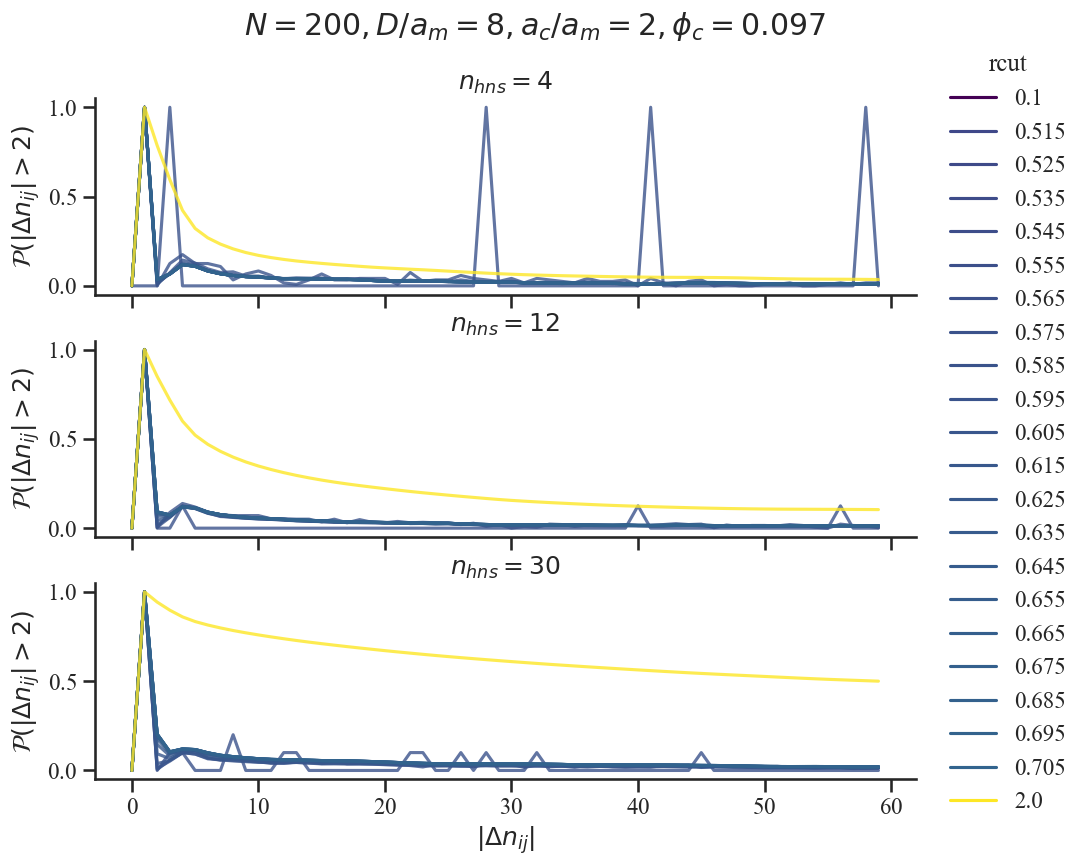

In [41]:
# Plotting loop length statistics
height = 3
aspect = 2 * 1.618 # Golden ratio
font_family = 'Times New Roman'#'DejaVu Sans'#'sans-serif' # 'Times New Roman'
#math_font = 'dejavuserif' #'stixsans'
font_scale = 1
plot_context = 'talk'
save_to = './'
ext = 'pdf'
color_palette = 'viridis'
rc_params = {
    #'mathtext.fontset': math_font, #'regular',
    #'mathtext.default': 'regular',
    'axes.formatter.use_mathtext': True,
    "font.family": font_family,  # use serif/main font for text elements
}
facet_kws = {
    'sharey': False,
    'sharex': 'col',
    'legend_out': True
}
legend_kws = {
    'ncol': 1,
    'frameon': True,
    'facecolor': 'white',
    'framealpha': 1.0,
    'edgecolor': 'black',
    'columnspacing': 1,
    'borderpad': 0.2,
    'handletextpad': 0.1,
    'markerscale': 3
}
fig_title_kws = {'x': 0.5, 'y': 0.97, 'ha': 'center'}
sns.set_theme(
    context=plot_context,
    style='ticks',
    palette=color_palette,
    font=font_family,
    font_scale=font_scale,
    rc=rc_params
)
col_order = sorted(loop_size_hist_melt['nhns'].unique())

loop_size_hist_melt_trunc = loop_size_hist_melt.loc[(loop_size_hist_melt['genomic_distance']>=0)&(loop_size_hist_melt['genomic_distance']<60),:]
f_grid = sns.relplot(
    data=loop_size_hist_melt_trunc,
    x='genomic_distance',
    y='frequency',
    col='nhns',
    hue='rcut',
    col_order=sorted(loop_size_hist_melt['nhns'].unique()),
    col_wrap=1,
    #col='distMatType',
    #col_order=['HnsPatch', 'HnsCore'],
    height=height,
    aspect=aspect,
    palette=color_palette,
    legend='full',
    kind='line',
    alpha=0.8,
    facet_kws=facet_kws
)

f_grid.set_titles(r'$n_{{hns}}={col_name}$')
#f_grid.set_titles('')

#for idx, (ax, col_name) in enumerate(zip(f_grid.axes.flat,col_order)):
#    ax.text(0.1,0.8, fr"$n_{{hns}}={col_name}$", transform=ax.transAxes)

f_grid.set_axis_labels(r'$|\Delta n_{ij}|$', r'$\mathcal{P}(|\Delta n_{ij}|>2)$')

#f_grid.set(xticks=rcut_m_hpatch_range)
f_grid.fig.suptitle(r'$N=200, D/a_m=8, a_c/a_m=2, \phi_c=0.097$', **fig_title_kws)
f_grid.tight_layout(w_pad=0.2, h_pad=0.2)
#f_grid.legend.set_title(r'$r_{thers}$')
#f_grid.legend.set(ncols=2)
#f_grid.set(yscale='log')
f_grid.savefig('loop_length_distribution.pdf', bbox_inches='tight', dpi=300)

In [42]:
#with open('./HnsCyl-choice_of_thershold-bindings_stats-MonHnsCore_and_MonHnsPatch.pkl', 'rb') as f:
with open('./HnsCyl-choice_of_thershold-bindings_stats-MonHnsPatch.pkl', 'rb') as f:
#with open('../../Datasets/HnsCyl-choice_of_thershold.pkl', 'rb') as f:
    loaded_dict = pickle.load(f)

## df from loop lengths histogram:
bindings_smaller = loaded_dict.copy()
#del bindings_smaller['results']
# binding dataframe
binding_df = pd.DataFrame.from_dict(bindings_smaller)
#nframes = 20001
nmon= 200
for col in ['n_hcore_free', 'n_hcore_bridge', 'n_hcore_dangle']:
    binding_df[col] = binding_df[col] / binding_df['nhns']
for col in ['n_hpatch_free', 'n_hpatch_engaged']:
    binding_df[col] = 0.5 * binding_df[col] / binding_df['nhns']
for col in ['n_mon_bound', 'n_mon_cis', 'n_mon_trans']:
    binding_df[col] =binding_df[col] / nmon
binding_df['n_hpatch_free'] = 2 - binding_df['n_hpatch_engaged']
#id_vars = ['dcrowd', 'phi_c_bulk', 'nhns', 'rcut', 'distMatType']
id_vars = ['dcrowd', 'phi_c_bulk', 'nhns', 'rcut']
#value_vars = ['n_hcore_free', 'n_hcore_bridge', 'n_hcore_dangle']
#value_vars = ['n_mon_bound', 'n_mon_cis', 'n_mon_trans']
#value_vars = ['n_hpatch_free', 'n_hpatch_engaged']
#binding_melt = pd.melt(binding_df, id_vars=id_vars, value_vars=value_vars, var_name='binding_types', value_name='averaged_bound_hns')

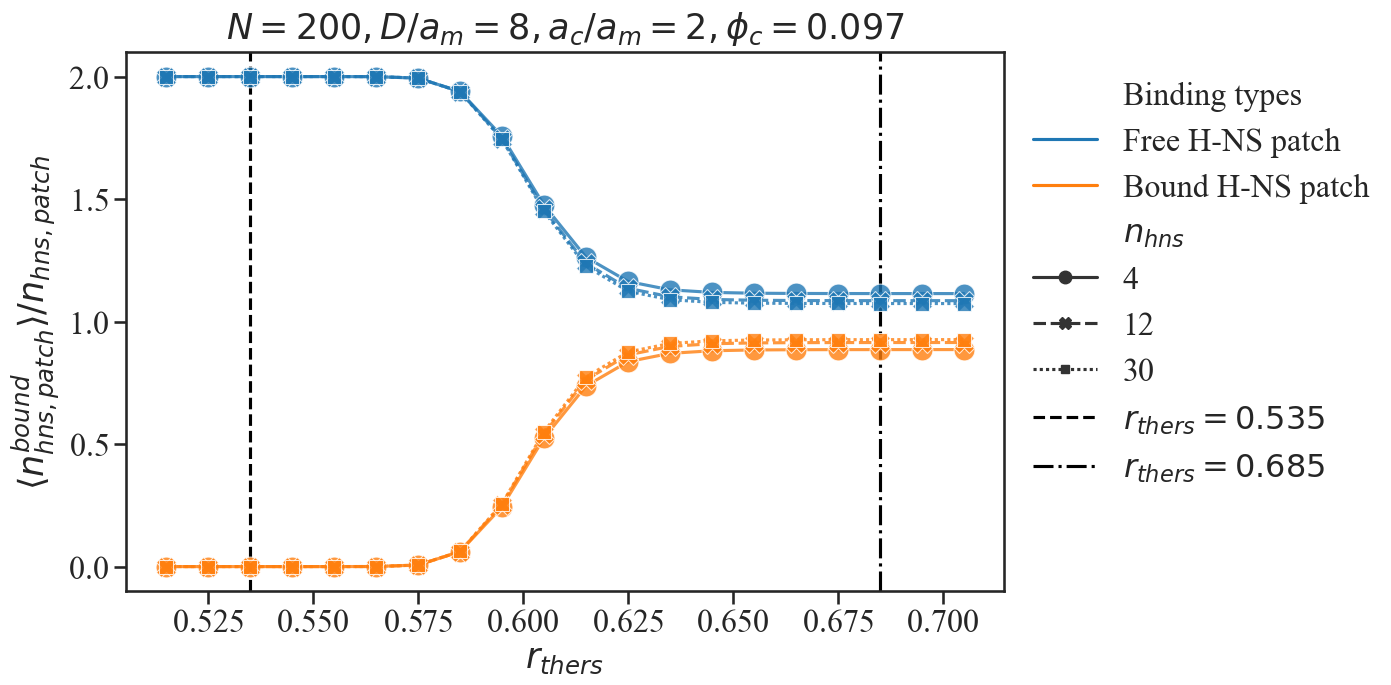

In [44]:
# plot: h patches
#binding_df_hpatch = binding_df.loc[binding_df['distMatType']=='HnsPatch',:]
value_vars = ['n_hpatch_free', 'n_hpatch_engaged']
binding_melt = pd.melt(binding_df, id_vars=id_vars, value_vars=value_vars, var_name='binding_types', value_name='averaged_bound_hns')
height = 7
aspect = 1.618 # Golden ratio
font_family = 'Times New Roman'#'DejaVu Sans'#'sans-serif' # 'Times New Roman'
#math_font = 'dejavusans' #'dejavuserif' #'stixsans'
font_scale = 1.4
plot_context = 'talk'
save_to = './'
ext = 'pdf'
color_palette = 'tab10'
rc_params = {
    #'mathtext.fontset': math_font, #'regular',
    #'mathtext.default': 'regular',
    'axes.formatter.use_mathtext': True,
    "font.family": font_family,  # use serif/main font for text elements
}
legend_kws = {
    'ncol': 1,
    'frameon': True,
    'facecolor': 'white',
    'framealpha': 1.0,
    'edgecolor': 'black',
    'columnspacing': 1,
    'borderpad': 0.2,
    'handletextpad': 0.1,
    'markerscale': 3
}
fig, ax = plt.subplots(1,1, figsize=(aspect*height,height)) 
sns.set_theme(
    context=plot_context,
    style='ticks',
    palette=color_palette,
    font=font_family,
    font_scale=font_scale,
    rc=rc_params
)
hue_order = list(binding_melt['binding_types'].unique())
hue_order = ['n_hpatch_free', 'n_hpatch_engaged']
col_order = sorted(binding_melt['nhns'].unique())
binding_melt_filter = binding_melt.loc[~binding_melt['rcut'].isin([0.1, 2]),:]
f_grid = sns.lineplot(
    data=binding_melt_filter,
    x='rcut',
    y='averaged_bound_hns',
    hue='binding_types',
    hue_order=hue_order,
    style='nhns',
    style_order=col_order,
    legend='full',
    dashes=True,
    markers=True,
    estimator=None,
    markersize=15,
    alpha=0.8,
    ax=ax
)
#ax.axvline(x=rcut_m_hpatch_range[0], color='black',label=r'$r_{thers}=(a_m+a_{h,patch})/2$', ls='--', zorder=0)
#ax.axvline(x=rcut_m_hpatch_range[-1], color='black',label=r'$r_{thers}=2^{1/6}(a_m+a_{h,patch})/2$',ls='-.', zorder=0)
ax.axvline(x=rcut_m_hpatch_range[0], color='black',label=fr'$r_{{thers}}={rcut_m_hpatch_range[0]}$', ls='--', zorder=0)
ax.axvline(x=rcut_m_hpatch_range[-1], color='black',label=fr'$r_{{thers}}={np.round(rcut_m_hpatch_range[-1],3)}$',ls='-.', zorder=0)
f_grid.set_title(r'$N=200, D/a_m=8, a_c/a_m=2, \phi_c=0.097$', y=1.01)
f_grid.set_xlabel(r'$r_{thers}$')
f_grid.set_ylabel(r'$\langle n_{hns, patch}^{bound}\rangle /n_{hns, patch}$')
#f_grid.set(xticks=rcut_m_hpatch_range)
handles, labels = ax.get_legend_handles_labels()
legend_labels = ['Binding types'] + ['Free H-NS patch', 'Bound H-NS patch'] + [r'$n_{hns}$'] + col_order + labels[-2:]
ax.legend(handles, legend_labels, loc='upper left', bbox_to_anchor=(1,1), frameon=False)
#ax.legend()
#f_grid.set(yscale='log')
#fig.tight_layout()#w_pad=0.2, h_pad=0.2)
fig.savefig('choice_of_thershold-hpatches.pdf', dpi=300,  bbox_inches='tight')

In [ ]:
#Figure: cis and trans monomers per distance matrix types
value_vars = ['n_hpatch_free', 'n_hpatch_engaged']
binding_melt = pd.melt(binding_df, id_vars=id_vars, value_vars=value_vars, var_name='binding_types', value_name='averaged_bound_hns')
height = 5
aspect = 0.75*1.618 # Golden ratio
font_family = 'Times New Roman'#'DejaVu Sans'#'sans-serif' # 'Times New Roman'
#math_font = 'dejavuserif' #'stixsans'
font_scale = 1
plot_context = 'talk'
save_to = './'
ext = 'pdf'
color_palette = 'tab10'
rc_params = {
    #'mathtext.fontset': math_font, #'regular',
    #'mathtext.default': 'regular',
    'axes.formatter.use_mathtext': True,
    "font.family": font_family,  # use serif/main font for text elements
}
facet_kws = {
    'sharey': 'col',
    'sharex': 'col',
    'legend_out': True
}
legend_kws = {
    'ncol': 1,
    'frameon': True,
    'facecolor': 'white',
    'framealpha': 1.0,
    'edgecolor': 'black',
    'columnspacing': 1,
    'borderpad': 0.2,
    'handletextpad': 0.1,
    'markerscale': 3
}
fig_title_kws = {'x': 0.4, 'y': 0.98, 'ha': 'center'}
sns.set_theme(
    context=plot_context,
    style='ticks',
    palette=color_palette,
    font=font_family,
    font_scale=font_scale,
    rc=rc_params
)
col_order = sorted(binding_melt['nhns'].unique())
f_grid = sns.relplot(
    data=binding_melt,
    x='rcut',
    y='averaged_bound_hns',
    hue='binding_types',
    col='distMatType',
    col_order=['HnsPatch', 'HnsCore'],
    row='nhns',
    row_order=col_order,
    height=height,
    aspect=aspect,
    palette=color_palette,
    legend='full',
    kind='line',
    marker='o',
    alpha=0.8,
    facet_kws=facet_kws
)

f_grid.set_titles(r'{col_name}: $n_{{hns}}={row_name}$')
#f_grid.set_titles('')
#for idx, (ax, col_name) in enumerate(zip(f_grid.axes.flat,col_order)):
#    ax.text(0.1,0.8, fr"$n_{{hns}}={col_name}$", transform=ax.transAxes)    
f_grid.set_axis_labels(r'$r_{thershold}$', r'$\langle n_{m}^{bound}\rangle /n_{m}$')
legend_labels = ['Free H-NS patch', 'Bound H-NS patch']
for idx, new_label in enumerate(legend_labels):
#    f_grid._legend.legendHandles[idx].set_linewidth(7)
    f_grid._legend.texts[idx].set_ha('left')
    f_grid._legend.texts[idx].set_text(new_label)
#f_grid.set(xticks=rcut_m_hpatch_range)
f_grid.fig.suptitle(r'$N=200, D/a_m=8, a_c/a_m=2, \phi_c=0.097$', **fig_title_kws)
f_grid.tight_layout(w_pad=0.2, h_pad=0.2)
sns.move_legend(f_grid, title='', loc='upper left', bbox_to_anchor=(0.2,0.8))
#f_grid.set(yscale='log')
f_grid.savefig('choice_of_thershold-cis_trans-dist_mat_types.pdf', bbox_inches='tight', dpi=300)

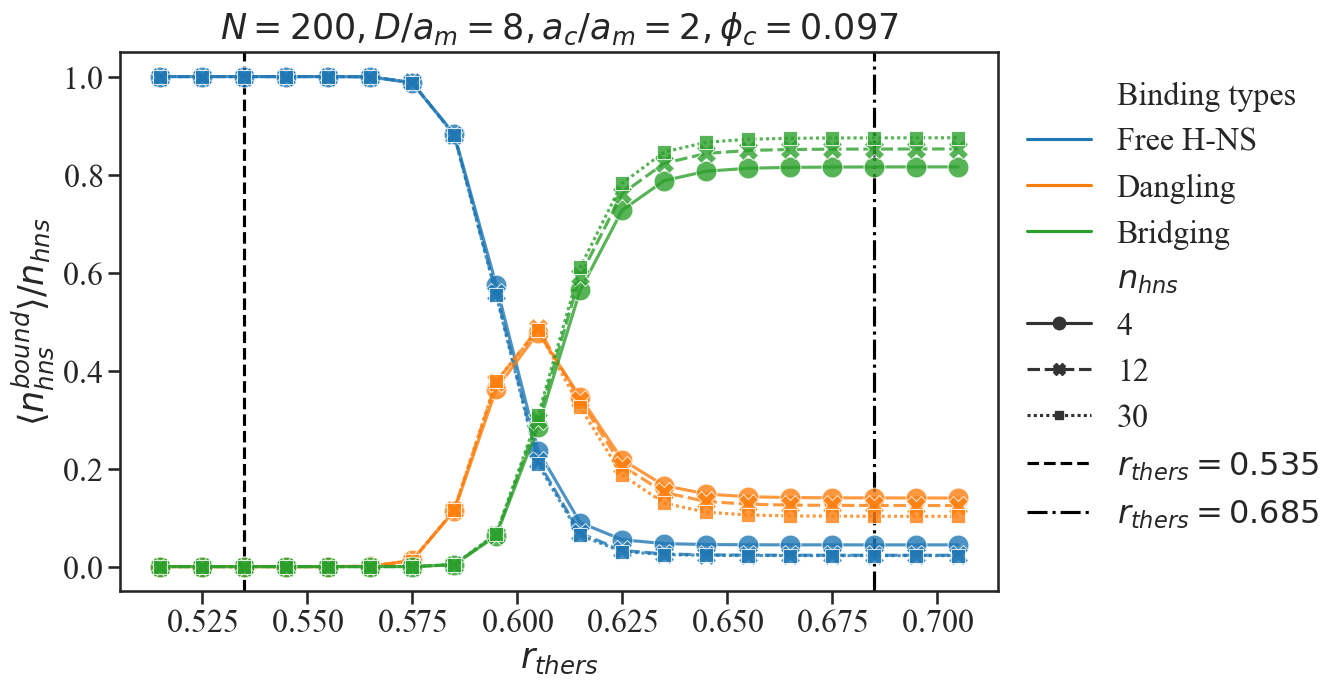

In [45]:
# Figure: h cores
#binding_df_hpatch = binding_df.loc[binding_df['distMatType']=='HnsPatch',:]
value_vars = ['n_hcore_free', 'n_hcore_bridge', 'n_hcore_dangle']
binding_melt = pd.melt(binding_df, id_vars=id_vars, value_vars=value_vars, var_name='binding_types', value_name='averaged_bound_hns')
height = 7
aspect = 1.618 # Golden ratio
font_family = 'Times New Roman'#'DejaVu Sans'#'sans-serif' # 'Times New Roman'
#math_font = 'dejavusans' #'dejavuserif' #'stixsans'
font_scale = 1.4
plot_context = 'talk'
save_to = './'
ext = 'pdf'
color_palette = 'tab10'
rc_params = {
    #'mathtext.fontset': math_font, #'regular',
    #'mathtext.default': 'regular',
    'axes.formatter.use_mathtext': True,
    "font.family": font_family,  # use serif/main font for text elements
}
legend_kws = {
    'ncol': 1,
    'frameon': True,
    'facecolor': 'white',
    'framealpha': 1.0,
    'edgecolor': 'black',
    'columnspacing': 1,
    'borderpad': 0.2,
    'handletextpad': 0.1,
    'markerscale': 3
}
fig, ax = plt.subplots(1,1, figsize=(aspect*height,height)) 
sns.set_theme(
    context=plot_context,
    style='ticks',
    palette=color_palette,
    font=font_family,
    font_scale=font_scale,
    rc=rc_params
)
hue_order = list(binding_melt['binding_types'].unique())
hue_order = ['n_hcore_free', 'n_hcore_dangle', 'n_hcore_bridge']
col_order = sorted(binding_melt['nhns'].unique())
binding_melt_filter = binding_melt.loc[~binding_melt['rcut'].isin([0.1, 2]),:]
f_grid = sns.lineplot(
    data=binding_melt_filter,
    x='rcut',
    y='averaged_bound_hns',
    hue='binding_types',
    hue_order=hue_order,
    style='nhns',
    style_order=col_order,
    legend='full',
    dashes=True,
    markers=True,
    estimator=None,
    markersize=15,
    alpha=0.8,
    ax=ax
)
#ax.axvline(x=rcut_m_hpatch_range[0], color='black',label=r'$r_{thers}=(a_m+a_{h,patch})/2$', ls='--', zorder=0)
#ax.axvline(x=rcut_m_hpatch_range[-1], color='black',label=r'$r_{thers}=2^{1/6}(a_m+a_{h,patch})/2$',ls='-.', zorder=0)
ax.axvline(x=rcut_m_hpatch_range[0], color='black',label=fr'$r_{{thers}}={rcut_m_hpatch_range[0]}$', ls='--', zorder=0)
ax.axvline(x=rcut_m_hpatch_range[-1], color='black',label=fr'$r_{{thers}}={np.round(rcut_m_hpatch_range[-1],3)}$',ls='-.', zorder=0)
f_grid.set_title(r'$N=200, D/a_m=8, a_c/a_m=2, \phi_c=0.097$', y=1.01)
f_grid.set_xlabel(r'$r_{thers}$')
f_grid.set_ylabel(r'$\langle n_{hns}^{bound}\rangle /n_{hns}$')
#f_grid.set(xticks=rcut_m_hpatch_range)
handles, labels = ax.get_legend_handles_labels()
legend_labels = ['Binding types'] + ['Free H-NS', 'Dangling', 'Bridging'] + [r'$n_{hns}$'] + col_order + labels[-2:]
ax.legend(handles, legend_labels, loc='upper left', bbox_to_anchor=(1,1), frameon=False)
#ax.legend()
#f_grid.set(yscale='log')
fig.savefig('choice_of_thershold-hns_cores.pdf', dpi=300,  bbox_inches='tight')

In [ ]:
#Figure: cis and trans monomers
value_vars = ['n_hcore_free', 'n_hcore_bridge', 'n_hcore_dangle']
binding_melt = pd.melt(binding_df, id_vars=id_vars, value_vars=value_vars, var_name='binding_types', value_name='averaged_bound_hns')
height = 5
aspect = 0.75*1.618 # Golden ratio
font_family = 'Times New Roman'#'DejaVu Sans'#'sans-serif' # 'Times New Roman'
#math_font = 'dejavuserif' #'stixsans'
font_scale = 1
plot_context = 'talk'
save_to = './'
ext = 'pdf'
color_palette = 'tab10'
rc_params = {
    #'mathtext.fontset': math_font, #'regular',
    #'mathtext.default': 'regular',
    'axes.formatter.use_mathtext': True,
    "font.family": font_family,  # use serif/main font for text elements
}
facet_kws = {
    'sharey': 'col',
    'sharex': 'col',
    'legend_out': True
}
legend_kws = {
    'ncol': 1,
    'frameon': True,
    'facecolor': 'white',
    'framealpha': 1.0,
    'edgecolor': 'black',
    'columnspacing': 1,
    'borderpad': 0.2,
    'handletextpad': 0.1,
    'markerscale': 3
}
fig_title_kws = {'x': 0.4, 'y': 0.98, 'ha': 'center'}
sns.set_theme(
    context=plot_context,
    style='ticks',
    palette=color_palette,
    font=font_family,
    font_scale=font_scale,
    rc=rc_params
)
col_order = sorted(binding_melt['nhns'].unique())
f_grid = sns.relplot(
    data=binding_melt,
    x='rcut',
    y='averaged_bound_hns',
    hue='binding_types',
    col='distMatType',
    col_order=['HnsPatch', 'HnsCore'],
    row='nhns',
    row_order=col_order,
    height=height,
    aspect=aspect,
    palette=color_palette,
    legend='full',
    kind='line',
    marker='o',
    alpha=0.8,
    facet_kws=facet_kws
)

f_grid.set_titles(r'{col_name}: $n_{{hns}}={row_name}$')
#f_grid.set_titles('')
#for idx, (ax, col_name) in enumerate(zip(f_grid.axes.flat,col_order)):
#    ax.text(0.1,0.8, fr"$n_{{hns}}={col_name}$", transform=ax.transAxes)    
f_grid.set_axis_labels(r'$r_{thershold}$', r'$\langle n_{m}^{bound}\rangle /n_{m}$')
legend_labels = ['Free H-NS patch', 'Bound H-NS patch']
for idx, new_label in enumerate(legend_labels):
#    f_grid._legend.legendHandles[idx].set_linewidth(7)
    f_grid._legend.texts[idx].set_ha('left')
    f_grid._legend.texts[idx].set_text(new_label)
#f_grid.set(xticks=rcut_m_hpatch_range)
f_grid.fig.suptitle(r'$N=200, D/a_m=8, a_c/a_m=2, \phi_c=0.097$', **fig_title_kws)
f_grid.tight_layout(w_pad=0.2, h_pad=0.2)
sns.move_legend(f_grid, title='', loc='upper left', bbox_to_anchor=(0.2,0.8))
#f_grid.set(yscale='log')
f_grid.savefig('choice_of_thershold-hns_cores-dist_mat_types.pdf', bbox_inches='tight', dpi=300)

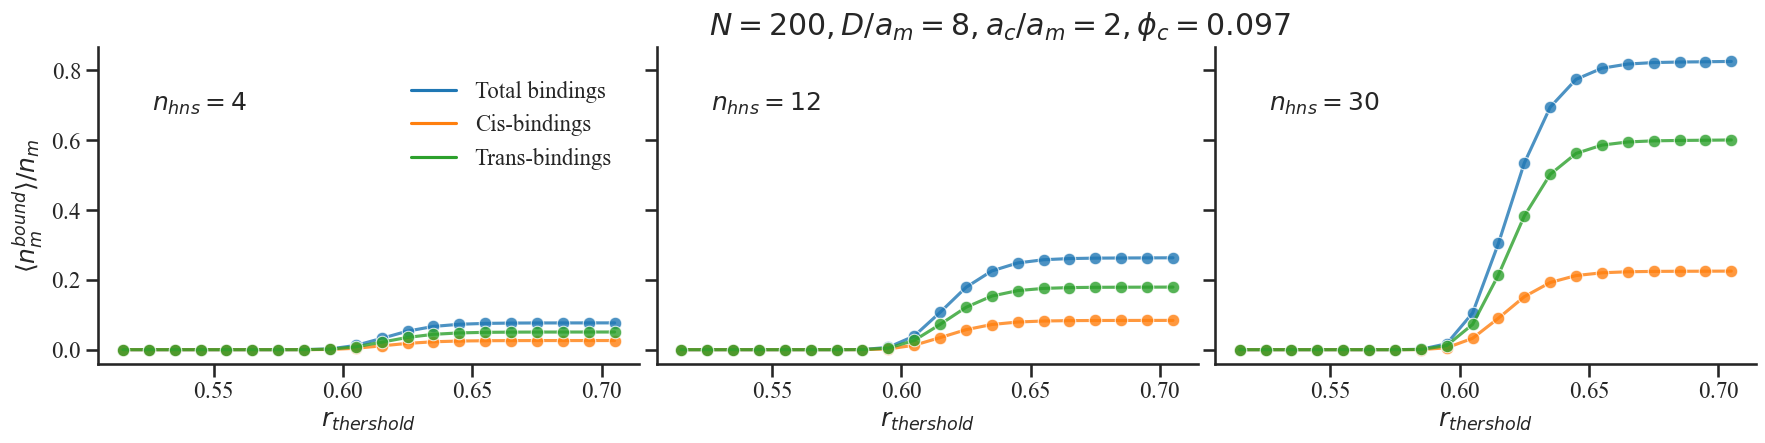

In [46]:
#Figure: cis and trans monomers
#binding_df_hpatch = binding_df.loc[binding_df['distMatType']=='HnsPatch',:]
value_vars = ['n_mon_bound', 'n_mon_cis', 'n_mon_trans']
binding_melt = pd.melt(binding_df, id_vars=id_vars, value_vars=value_vars, var_name='binding_types', value_name='averaged_bound_hns')
height = 5
aspect = 0.75*1.618 # Golden ratio
font_family = 'Times New Roman'#'DejaVu Sans'#'sans-serif' # 'Times New Roman'
#math_font = 'dejavuserif' #'stixsans'
font_scale = 1
plot_context = 'talk'
save_to = './'
ext = 'pdf'
color_palette = 'tab10'
rc_params = {
    #'mathtext.fontset': math_font, #'regular',
    #'mathtext.default': 'regular',
    'axes.formatter.use_mathtext': True,
    "font.family": font_family,  # use serif/main font for text elements
}
facet_kws = {
    'sharey': True,
    'sharex': True,
    'legend_out': True
}
legend_kws = {
    'ncol': 1,
    'frameon': True,
    'facecolor': 'white',
    'framealpha': 1.0,
    'edgecolor': 'black',
    'columnspacing': 1,
    'borderpad': 0.2,
    'handletextpad': 0.1,
    'markerscale': 3
}
fig_title_kws = {'y': 0.9, 'ha': 'center'}
sns.set_theme(
    context=plot_context,
    style='ticks',
    palette=color_palette,
    font=font_family,
    font_scale=font_scale,
    rc=rc_params
)
binding_melt_filter
col_order = sorted(binding_melt['nhns'].unique())
binding_melt_filter = binding_melt.loc[~binding_melt['rcut'].isin([0.1, 2]),:]
f_grid = sns.relplot(
    data=binding_melt_filter,
    x='rcut',
    y='averaged_bound_hns',
    hue='binding_types',
    col='nhns',
    col_order=col_order,
    col_wrap=3,
    height=height,
    aspect=aspect,
    palette=color_palette,
    legend='full',
    kind='line',
    marker='o',
    alpha=0.8,
    facet_kws=facet_kws
)

f_grid.set_titles(r'$n_{{hns}}={col_name}$')
f_grid.set_titles('')
for idx, (ax, col_name) in enumerate(zip(f_grid.axes.flat,col_order)):
    ax.text(0.1,0.8, fr"$n_{{hns}}={col_name}$", transform=ax.transAxes)    
f_grid.set_axis_labels(r'$r_{thershold}$', r'$\langle n_{m}^{bound}\rangle /n_{m}$')
legend_labels = ['Total bindings', 'Cis-bindings', 'Trans-bindings']
for idx, new_label in enumerate(legend_labels):
#    f_grid._legend.legendHandles[idx].set_linewidth(7)
    f_grid._legend.texts[idx].set_ha('left')
    f_grid._legend.texts[idx].set_text(new_label)
#f_grid.set(xticks=rcut_m_hpatch_range)
f_grid.fig.suptitle(r'$N=200, D/a_m=8, a_c/a_m=2, \phi_c=0.097$', **fig_title_kws)
f_grid.tight_layout(w_pad=0.2, h_pad=0.2)
sns.move_legend(f_grid, title='', loc='upper left', bbox_to_anchor=(0.2,0.8))
#f_grid.set(yscale='log')
f_grid.savefig('choice_of_thershold-cis_trans.pdf', bbox_inches='tight', dpi=300)

In [ ]:
#Figure: cis and trans monomers
binding_df_hpatch = binding_df.loc[binding_df['distMatType']=='HnsPatch',:]
value_vars = ['n_mon_bound', 'n_mon_cis', 'n_mon_trans']
binding_melt = pd.melt(binding_df_hpatch, id_vars=id_vars, value_vars=value_vars, var_name='binding_types', value_name='averaged_bound_hns')
height = 7
aspect = 1.618 # Golden ratio
font_family = 'Times New Roman'#'DejaVu Sans'#'sans-serif' # 'Times New Roman'
#math_font = 'dejavusans' #'dejavuserif' #'stixsans'
font_scale = 1.4
plot_context = 'talk'
save_to = './'
ext = 'pdf'
color_palette = 'tab10'
rc_params = {
    #'mathtext.fontset': math_font, #'regular',
    #'mathtext.default': 'regular',
    'axes.formatter.use_mathtext': True,
    "font.family": font_family,  # use serif/main font for text elements
}
legend_kws = {
    'ncol': 1,
    'frameon': True,
    'facecolor': 'white',
    'framealpha': 1.0,
    'edgecolor': 'black',
    'columnspacing': 1,
    'borderpad': 0.2,
    'handletextpad': 0.1,
    'markerscale': 3
}
fig, ax = plt.subplots(1,1, figsize=(aspect*height,height)) 
sns.set_theme(
    context=plot_context,
    style='ticks',
    palette=color_palette,
    font=font_family,
    font_scale=font_scale,
    rc=rc_params
)
hue_order = list(binding_melt['binding_types'].unique())
#hue_order = ['n_hcore_free', 'n_hcore_dangle', 'n_hcore_bridge']
col_order = sorted(binding_melt['nhns'].unique())
f_grid = sns.lineplot(
    data=binding_melt,
    x='rcut',
    y='averaged_bound_hns',
    hue='binding_types',
    hue_order=hue_order,
    style='nhns',
    style_order=col_order,
    legend='full',
    dashes=True,
    markers=True,
    estimator=None,
    markersize=15,
    alpha=0.8,
    ax=ax
)
#ax.axvline(x=rcut_m_hpatch_range[0], color='black',label=r'$r_{thers}=(a_m+a_{h,patch})/2$', ls='--', zorder=0)
#ax.axvline(x=rcut_m_hpatch_range[-1], color='black',label=r'$r_{thers}=2^{1/6}(a_m+a_{h,patch})/2$',ls='-.', zorder=0)
ax.axvline(x=rcut_m_hpatch_range[0], color='black',label=fr'$r_{{thers}}={rcut_m_hpatch_range[0]}$', ls='--', zorder=0)
ax.axvline(x=rcut_m_hpatch_range[-1], color='black',label=fr'$r_{{thers}}={np.round(rcut_m_hpatch_range[-1],3)}$',ls='-.', zorder=0)
f_grid.set_title(r'$N=200, D/a_m=8, a_c/a_m=2, \phi_c=0.097$', y=1.01)
f_grid.set_xlabel(r'$r_{thers}$')
f_grid.set_ylabel(r'$\langle n_{m}^{bound}\rangle /n_{m}$')
#f_grid.set(xticks=rcut_m_hpatch_range)
handles, labels = ax.get_legend_handles_labels()
legend_labels = ['Binding types'] + ['Total bindings', 'Cis-bindings', 'Trans-bindings'] + [r'$n_{hns}$'] + col_order + labels[-2:]
ax.legend(handles[1:], legend_labels[1:], loc='upper left', bbox_to_anchor=(1,1), frameon=False)
#f_grid.set(yscale='log')
fig.savefig('choice_of_thershold-cis_trans-all_in_one.pdf', dpi=300, bbox_inches='tight')